<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import wget

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
filename = wget.download(url)

### Load Data From CSV File


In [4]:
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



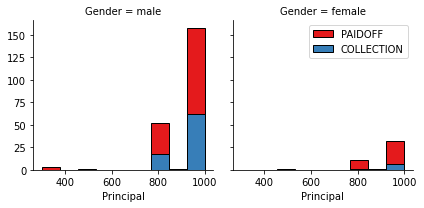

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

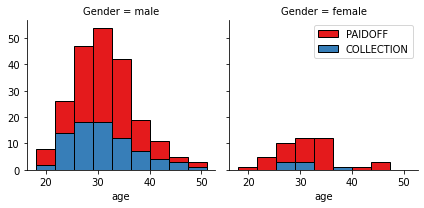

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


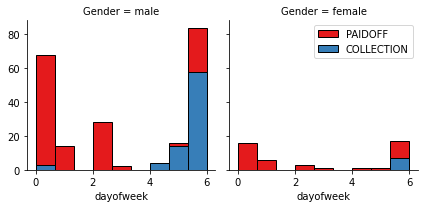

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

# Test size set from 0.2 to 0.4

Range_test_size = range (2,5)

# K values from o to 30

Ks = 30

Range_K = range(1,Ks)

#Allocate Space for the test mean accuracy, f1score and jaccard_score 

mean_acc = np.zeros([len(Range_test_size),len(Range_K)], dtype=float)
f1_score_ = np.zeros([len(Range_test_size),len(Range_K)], dtype=float)
jaccard_score_ = np.zeros([len(Range_test_size),len(Range_K)], dtype=float)

#Iterate through different test-sizes and K values:

for i in Range_test_size:
    
    X = Feature
    y = df['loan_status'].values
    X = preprocessing.StandardScaler().fit(X).transform(X)
    test_size_ = i/10
    
    # Create the split in train_loan.csv df for test and train data 
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = test_size_, random_state=4)
    
    for n in Range_K:
        
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        
        mean_acc[i-2,n-1] = metrics.accuracy_score(y_test, yhat)
        f1_score_[i-2,n-1] = f1_score(y_test, yhat, average='weighted')
        jaccard_score_[i-2,n-1] = jaccard_score(y_test, yhat,pos_label='PAIDOFF')
       
 #Get the value of the highest test accuracy   

print("The best accuracy was with", mean_acc.max(), "with k=", (mean_acc.argmax()+1)) 
print("The best f1 score was with", f1_score_.max(), "with k=", (f1_score_.argmax()+1))
print("The best jaccard score was with", jaccard_score_.max(), "with k=", (jaccard_score_.argmax()+1))



The best accuracy was with 0.7857142857142857 with k= 7
The best f1 score was with 0.7766540244416351 with k= 7
The best jaccard score was with 0.782608695652174 with k= 29


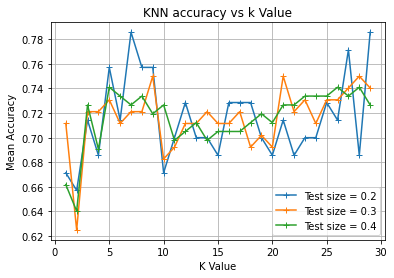

In [22]:
# Create a plot for visualisation of the test Accuracy

X = np.linspace(1, Ks-1, num = Ks-1)

plt.plot(X, mean_acc[0], marker = '+')
plt.plot(X, mean_acc[1], marker = '+')
plt.plot(X, mean_acc[2], marker = '+')
plt.title('KNN accuracy vs k Value')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.grid()

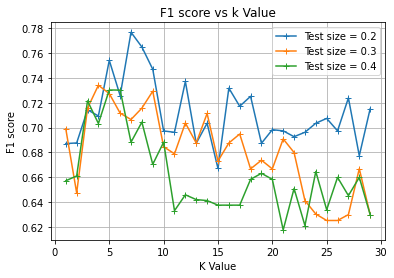

In [23]:
# Create a plot for visualisation of the f1 score

X = np.linspace(1, Ks-1, num = Ks-1)

plt.plot(X,f1_score_[0], marker = '+')
plt.plot(X,f1_score_[1], marker = '+')
plt.plot(X,f1_score_[2], marker = '+')
plt.title('F1 score vs k Value')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('K Value')
plt.ylabel('F1 score')
plt.grid()

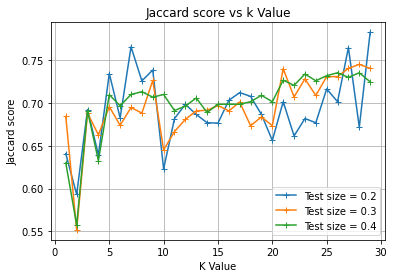

In [24]:
# Create a plot for visualisation of the jaccard score

X = np.linspace(1, Ks-1, num = Ks-1)

plt.plot(X,jaccard_score_[0], marker = '+')
plt.plot(X,jaccard_score_[1], marker = '+')
plt.plot(X,jaccard_score_[2], marker = '+')
plt.title('Jaccard score vs k Value')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('K Value')
plt.ylabel('Jaccard score')
plt.grid()

#### As we can see, the best accuracy and scores is obtained for k = 7 and test_size = 0.2. If k is iterated from 0 to 100, we would get better jaccard score for k = 47.

In [26]:
# Building the model again, using k=7 and test-size = 0.2
from sklearn.neighbors import KNeighborsClassifier
X = Feature
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=4)
KNN_model = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
KNN_model

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline


# Test size set from 0.2 to 0.4

Range_test_size = range(2,5)


#Allocate Space for the test mean accuracy, f1_score and jaccard_score 

mean_acc_DT = []
f1_score_DT = []
jaccard_score_DT = []

for i in Range_test_size:
    
    X = Feature
    y = df['loan_status'].values
    X = preprocessing.StandardScaler().fit(X).transform(X)
    test_size_ = i/10
    
    # Create the split in train_loan.csv df for test and train data 
    
    X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size = test_size_, random_state=4)
    
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
    
    dectree = drugTree.fit(X_trainset,y_trainset)
    
    predTree = dectree.predict(X_testset)
    
    # predTree = drugTree.predict(X_testset) - It says it like this in the notebook
        
    mean_acc_DT.append(metrics.accuracy_score(y_testset, predTree))
    f1_score_DT.append(f1_score(y_testset, predTree, average='weighted'))
    jaccard_score_DT.append(jaccard_score(y_testset, predTree,pos_label='PAIDOFF'))

    #Get the value of the highest test accuracy   

print("The best accuracy was with", max(mean_acc_DT)) 
print("The best f1 score was with", max(f1_score_DT))
print("The best jaccard score was with", max(jaccard_score_DT))



The best accuracy was with 0.7403846153846154
The best f1 score was with 0.6445993031358885
The best jaccard score was with 0.7403846153846154


In [ ]:
mean_acc_DT

[0.6142857142857143, 0.7403846153846154, 0.7338129496402878]

In [ ]:
f1_score_DT

[0.6445993031358885, 0.6299405014874628, 0.6211528702349324]

In [ ]:
jaccard_score_DT

[0.5714285714285714, 0.7403846153846154, 0.7338129496402878]

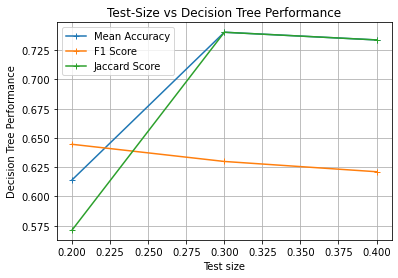

In [ ]:
TestsizeDT = list(Range_test_size)
TestSizeDT = []
for number in TestsizeDT:
    TestSizeDT.append(number / 10)
    
plt.plot(TestSizeDT,mean_acc_DT, marker = '+')
plt.plot(TestSizeDT,f1_score_DT, marker = '+')
plt.plot(TestSizeDT,jaccard_score_DT, marker = '+')
plt.title('Test-Size vs Decision Tree Performance')
plt.legend(('Mean Accuracy', 'F1 Score', 'Jaccard Score'))
plt.xlabel('Test size')
plt.ylabel('Decision Tree Performance')
plt.grid()

#### In this case, the accuracy and scores are better for a test-size of 0.3.

In [ ]:
# Building the model again, using test-size = 0.3
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size = 0.3, random_state=4)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model = drugTree.fit(X_trainset,y_trainset)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Support Vector Machine (SVM)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline


# Test size set from 0.2 to 0.4

Range_test_size = range (2,5)

# Kernel function types

Kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

Range_Kernel = range(0,len(Kernel_values))

#Allocate Space for the test mean accuracy, f1score and jaccard_score 

mean_acc = np.zeros([len(Range_test_size),len(Range_Kernel)], dtype=float)
f1_score_ = np.zeros([len(Range_test_size),len(Range_Kernel)], dtype=float)
jaccard_score_ = np.zeros([len(Range_test_size),len(Range_Kernel)], dtype=float)

#Iterate through different test-sizes and Kernel values:

for i in Range_test_size:
    
    X = Feature
    y = df['loan_status'].values
    X = preprocessing.StandardScaler().fit(X).transform(X)
    test_size_ = i/10
    
    # Create the split in train_loan.csv df for test and train data 
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = test_size_, random_state=4)
    
    for n in Range_Kernel:
              
        clf = svm.SVC(kernel= Kernel_values[n])
        predclf = clf.fit(X_train, y_train)
        yhat = predclf.predict(X_test)
        
        mean_acc[i-2,n] = metrics.accuracy_score(y_test, yhat)
        f1_score_[i-2,n] = f1_score(y_test, yhat, average='weighted')
        jaccard_score_[i-2,n] = jaccard_score(y_test, yhat,pos_label='PAIDOFF')
       
 #Get the value of the highest test accuracy   

print("The best accuracy was with", mean_acc.max()) 
print("The best f1 score was with", f1_score_.max())
print("The best jaccard score was with", jaccard_score_.max())


The best accuracy was with 0.7857142857142857
The best f1 score was with 0.7275882012724117
The best jaccard score was with 0.7857142857142857


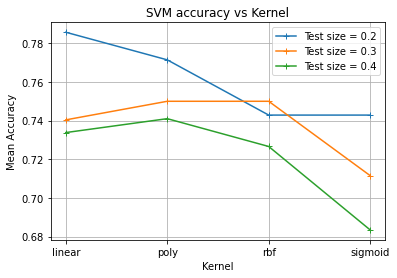

In [ ]:
# Create a plot for visualisation of the test Accuracy

plt.plot(Kernel_values, mean_acc[0], marker = '+')
plt.plot(Kernel_values, mean_acc[1], marker = '+')
plt.plot(Kernel_values, mean_acc[2], marker = '+')
plt.title('SVM accuracy vs Kernel')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Kernel')
plt.ylabel('Mean Accuracy')
plt.grid()

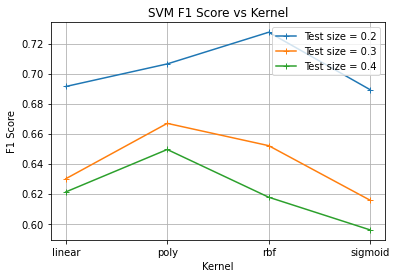

In [ ]:
# Create a plot for visualisation of the F1 Score

plt.plot(Kernel_values, f1_score_[0], marker = '+')
plt.plot(Kernel_values, f1_score_[1], marker = '+')
plt.plot(Kernel_values, f1_score_[2], marker = '+')
plt.title('SVM F1 Score vs Kernel')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Kernel')
plt.ylabel('F1 Score')
plt.grid()

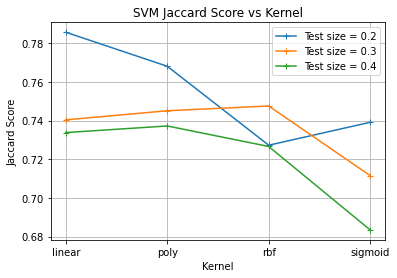

In [ ]:
# Create a plot for visualisation of the Jaccard Score

plt.plot(Kernel_values, jaccard_score_[0], marker = '+')
plt.plot(Kernel_values, jaccard_score_[1], marker = '+')
plt.plot(Kernel_values, jaccard_score_[2], marker = '+')
plt.title('SVM Jaccard Score vs Kernel')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Kernel')
plt.ylabel('Jaccard Score')
plt.grid()

#### In this case, the test size will be 0.2 as it generally remains higher for most of the kernels, and the kernel chosen will be the linear one

In [ ]:
from sklearn import svm
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size = 0.2, random_state=4)
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_trainset, y_trainset) 
SVM_model

SVC(kernel='linear')

# Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import log_loss
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline


# Test size set from 0.2 to 0.4

Range_test_size = range (2,5)

# Optimizers

Solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

Range_Solver = range(0,len(Solver_values))

#Allocate Space for the test mean accuracy, f1 score, jaccard_score and log_loss

mean_acc = np.zeros([len(Range_test_size),len(Range_Solver)], dtype=float)
f1_score_ = np.zeros([len(Range_test_size),len(Range_Solver)], dtype=float)
jaccard_score_ = np.zeros([len(Range_test_size),len(Range_Solver)], dtype=float)
log_loss_ = np.zeros([len(Range_test_size),len(Range_Solver)], dtype=float)

#Iterate through different test-sizes and Solver values:

for i in Range_test_size:
    
    X = Feature
    y = df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1]).values
    X = preprocessing.StandardScaler().fit(X).transform(X)
    test_size_ = i/10
    
    # Create the split in train_loan.csv df for test and train data 
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = test_size_, random_state=4)
    
    for n in Range_Solver:
        
        LR = LogisticRegression(C=0.01, solver=Solver_values[n]).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        
        mean_acc[i-2,n] = metrics.accuracy_score(y_test, yhat)
        f1_score_[i-2,n] = f1_score(y_test, yhat, average='weighted')
        jaccard_score_[i-2,n] = jaccard_score(y_test, yhat)
        log_loss_[i-2,n] = log_loss(y_test, yhat)
        
 #Get the value of the highest test accuracy   

print("The best accuracy was:", mean_acc.max()) 
print("The best f1 score was:", f1_score_.max())
print("The best jaccard score was:", jaccard_score_.max())
print("The max log_loss was:", log_loss_.max())


The best accuracy was: 0.7857142857142857
The best f1 score was: 0.6914285714285714
The best jaccard score was: 0.7857142857142857
The max log_loss was: 10.85519250649468


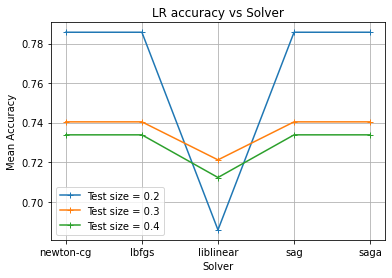

In [ ]:
# Create a plot for visualisation of the test Accuracy

plt.plot(Solver_values, mean_acc[0], marker = '+')
plt.plot(Solver_values, mean_acc[1], marker = '+')
plt.plot(Solver_values, mean_acc[2], marker = '+')
plt.title('LR accuracy vs Solver')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Solver')
plt.ylabel('Mean Accuracy')
plt.grid()

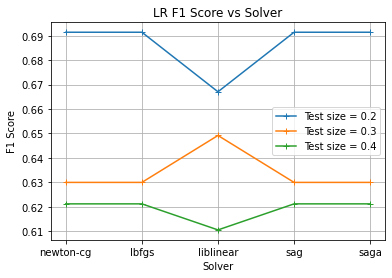

In [ ]:
# Create a plot for visualisation of the f1 score

plt.plot(Solver_values, f1_score_[0], marker = '+')
plt.plot(Solver_values, f1_score_[1], marker = '+')
plt.plot(Solver_values, f1_score_[2], marker = '+')
plt.title('LR F1 Score vs Solver')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Solver')
plt.ylabel('F1 Score')
plt.grid()

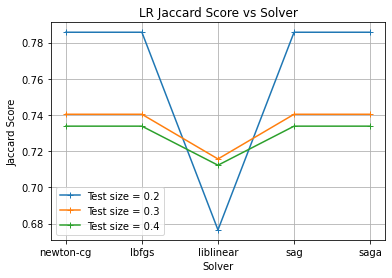

In [ ]:
# Create a plot for visualisation of the Jaccard score

plt.plot(Solver_values, jaccard_score_[0], marker = '+')
plt.plot(Solver_values, jaccard_score_[1], marker = '+')
plt.plot(Solver_values, jaccard_score_[2], marker = '+')
plt.title('LR Jaccard Score vs Solver')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Solver')
plt.ylabel('Jaccard Score')
plt.grid()

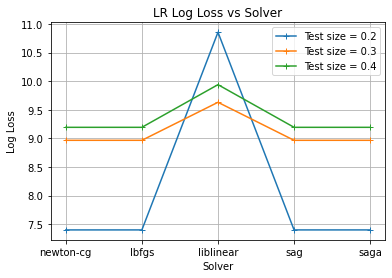

In [ ]:
# Create a plot for visualisation of the Log loss

plt.plot(Solver_values, log_loss_[0], marker = '+')
plt.plot(Solver_values, log_loss_[1], marker = '+')
plt.plot(Solver_values, log_loss_[2], marker = '+')
plt.title('LR Log Loss vs Solver')
plt.legend(('Test size = 0.2', 'Test size = 0.3', 'Test size = 0.4'))
plt.xlabel('Solver')
plt.ylabel('Log Loss')
plt.grid()

#### From previous graphs we can see that for best results solver = lbfgs and test-size = 0.2

In [ ]:
from sklearn.linear_model import LogisticRegression
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size = 0.2, random_state=4)
LR_model = LogisticRegression(C=0.01, solver='lbfgs').fit(X_trainset,y_trainset)
yhat = LR.predict(X_testset)

# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [ ]:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
filename = wget.download(url)
test_df = pd.read_csv(filename)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [ ]:
# Preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature_ = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)

In [ ]:
Y_test_ = test_df['loan_status'].values

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## KNN

In [ ]:
Feature_[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [ ]:
# Predict yhat using our model and the test df
yhat_KNN=KNN_model.predict(Feature_)
        
# Evaluate our Model

print("KNN Jaccard index: %.2f" % jaccard_score(Y_test_, yhat_KNN, pos_label='PAIDOFF'))
print("KNN F1-score: %.2f" % f1_score(Y_test_, yhat_KNN, average='weighted') )

KNN Jaccard index: 0.65
KNN F1-score: 0.63


## Decision Tree

In [ ]:
# Predict yhat using our model and the test df
yhat_DT=DT_model.predict(Feature_)
        
# Evaluate our Model

print("DT Jaccard index: %.2f" % jaccard_score(Y_test_, yhat_DT, pos_label='PAIDOFF'))
print("DT F1-score: %.2f" % f1_score(Y_test_, yhat_DT, average='weighted') )

DT Jaccard index: 0.75
DT F1-score: 0.67


## SVM

In [ ]:
# Predict yhat using our model and the test df
yhat_SVM=SVM_model.predict(Feature_)
        
# Evaluate our Model

print("SVM Jaccard index: %.2f" % jaccard_score(Y_test_, yhat_SVM, pos_label='PAIDOFF'))
print("SVM F1-score: %.2f" % f1_score(Y_test_, yhat_SVM, average='weighted') )

SVM Jaccard index: 0.74
SVM F1-score: 0.63


## Logistic Regression

In [ ]:

# Predict yhat using our model and the test df
yhat_LR=LR_model.predict(Feature_)
yhat_LR_prob = LR_model.predict_proba(Feature_)
# Evaluate our Model
print("KNN Jaccard index: %.2f" % jaccard_score(Y_test_, yhat_LR, pos_label='PAIDOFF'))
print("KNN F1-score: %.2f" % f1_score(Y_test_, yhat_LR, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(Y_test_, yhat_LR_prob))

KNN Jaccard index: 0.74
KNN F1-score: 0.63
LR LogLoss: 0.52


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.7407  | 0.63041  | NA      |
| Decision Tree      | 0.7407  | 0.63041  | NA      |
| SVM                | 0.7407  | 0.63041  | NA      |
| LogisticRegression | 0.1067  | 0.0      | 25.5842 |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
